In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('gurgaon_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,13035.714286,3.0,5.0,2,3.0,Relatively New,2800.0,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,6345.177665,4.0,4.0,3,12.0,Moderately Old,1970.0,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,6127.770535,2.0,2.0,1,0.0,New Property,767.0,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,11875.000000,3.0,3.0,3,2.0,Old Property,1600.0,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.000000,3.0,4.0,3+,3.0,New Property,2152.0,0,1,0,0,0,0,49


In [5]:
df.shape

(3802, 18)

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 112,3.65,3.0,5.0,2,3.0,Relatively New,2800.0,0,1,0,0,0,0,72
1,flat,sector 83,1.25,4.0,4.0,3,12.0,Moderately Old,1970.0,0,1,0,0,0,0,103
2,flat,sector 90,0.47,2.0,2.0,1,0.0,New Property,767.0,0,0,0,0,0,0,49
3,flat,sector 49,1.90,3.0,3.0,3,2.0,Old Property,1600.0,0,0,0,0,1,2,49
4,flat,sector 79,2.69,3.0,4.0,3+,3.0,New Property,2152.0,0,1,0,0,0,0,49


<Axes: ylabel='luxury_score'>

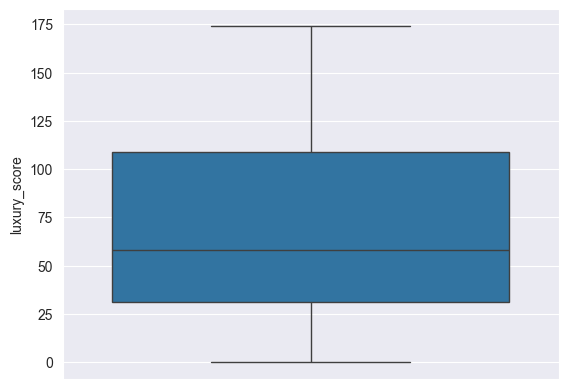

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df['luxury_category'].value_counts()

luxury_category
Low       1737
Medium    1562
High       503
Name: count, dtype: int64

In [12]:
train_df['luxury_category'].isnull().sum()

0

<Axes: ylabel='floorNum'>

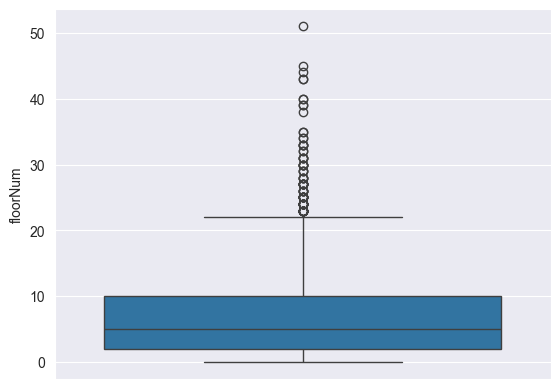

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [15]:

train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df['floor_category'].value_counts()

floor_category
Mid Floor     1941
Low Floor     1023
High Floor     838
Name: count, dtype: int64

In [17]:
train_df['floor_category'].isnull().sum()


0

In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 112,3.65,3.0,5.0,2,Relatively New,2800.0,0,1,0,0,0,0,Medium,Mid Floor
1,flat,sector 83,1.25,4.0,4.0,3,Moderately Old,1970.0,0,1,0,0,0,0,Medium,High Floor
2,flat,sector 90,0.47,2.0,2.0,1,New Property,767.0,0,0,0,0,0,0,Low,Low Floor
3,flat,sector 49,1.90,3.0,3.0,3,Old Property,1600.0,0,0,0,0,1,2,Low,Low Floor
4,flat,sector 79,2.69,3.0,4.0,3+,New Property,2152.0,0,1,0,0,0,0,Low,Mid Floor


In [21]:

from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']


[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3802 non-null   object 
 1   sector           3802 non-null   object 
 2   price            3802 non-null   float64
 3   bedRoom          3802 non-null   float64
 4   bathroom         3802 non-null   float64
 5   balcony          3802 non-null   object 
 6   agePossession    3802 non-null   object 
 7   built_up_area    3802 non-null   float64
 8   study room       3802 non-null   int64  
 9   servant room     3802 non-null   int64  
 10  store room       3802 non-null   int64  
 11  pooja room       3802 non-null   int64  
 12  others           3802 non-null   int64  
 13  furnishing_type  3802 non-null   int64  
 14  luxury_category  3802 non-null   object 
 15  floor_category   3802 non-null   object 
dtypes: float64(4), int64(6), object(6)
memory usage: 475.4+ KB


In [24]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,16.0,3.0,5.0,2.0,3.0,2800.0,0,1,0,0,0,0,2.0,2.0
1,0.0,95.0,4.0,4.0,3.0,0.0,1970.0,0,1,0,0,0,0,2.0,0.0
2,0.0,103.0,2.0,2.0,1.0,1.0,767.0,0,0,0,0,0,0,1.0,1.0
3,0.0,55.0,3.0,3.0,3.0,2.0,1600.0,0,0,0,0,1,2,1.0,1.0
4,0.0,89.0,3.0,4.0,4.0,1.0,2152.0,0,1,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,0.0,43.0,3.0,3.0,4.0,1.0,2211.0,0,1,0,0,0,0,1.0,2.0
3798,0.0,44.0,3.0,3.0,3.0,4.0,1389.0,0,0,0,0,0,0,1.0,1.0
3799,0.0,97.0,4.0,4.0,3.0,3.0,2600.0,0,0,0,0,0,0,1.0,1.0
3800,0.0,17.0,4.0,4.0,4.0,3.0,2991.0,1,1,0,0,0,0,0.0,0.0


In [25]:
Y_label

NameError: name 'Y_label' is not defined

In [26]:
y_label

0       3.65
1       1.25
2       0.47
3       1.90
4       2.69
        ... 
3797    1.44
3798    1.10
3799    2.10
3800    3.35
3801    0.51
Name: price, Length: 3802, dtype: float64

#### correlation analysis

<Axes: >

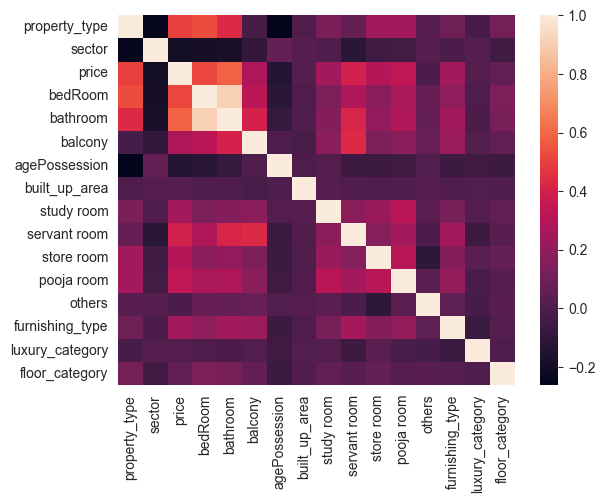

In [27]:
 sns.heatmap(data_label_encoded.corr())

In [28]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

In [29]:
fi_df1


,feature,corr_coeff
0,sector,-0.199982
1,price,1.000000
2,bedRoom,0.516145
3,bathroom,0.581606
4,balcony,0.278906
5,agePossession,-0.134261
6,built_up_area,0.014957
7,study room,0.253355
8,servant room,0.398101
9,store room,0.303605


#### random forest feature importance

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)
# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)
fi_df2

,feature,rf_importance
6,built_up_area,0.548330
0,property_type,0.129339
1,sector,0.122213
3,bathroom,0.069084
8,servant room,0.027447
2,bedRoom,0.023242
5,agePossession,0.017368
4,balcony,0.015237
12,furnishing_type,0.009679
7,study room,0.009014


#### gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)
 #Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)
fi_df3

,feature,gb_importance
6,built_up_area,0.598023
0,property_type,0.121936
1,sector,0.115869
3,bathroom,0.090757
8,servant room,0.034877
2,bedRoom,0.021754
5,agePossession,0.005193
7,study room,0.004040
12,furnishing_type,0.003119
9,store room,0.001022


#### permutation technique
 How It Works (Simple Explanation)
Train your model.

Measure the model’s performance (e.g., accuracy, R²).

For each feature:

Shuffle its values (break the relationship with the target).

Measure the model’s performance again.

The drop in performance = importance of that feature.

 The more performance drops → the more important the feature is.

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)
# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

In [33]:
fi_df4

,feature,permutation_importance
6,built_up_area,0.477252
0,property_type,0.229729
1,sector,0.142777
3,bathroom,0.092668
8,servant room,0.022771
2,bedRoom,0.009376
4,balcony,0.007313
5,agePossession,0.007306
14,floor_category,0.002917
11,others,0.001614


In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)
# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)
fi_df5

,feature,lasso_coeff
3,bathroom,1.386891
0,property_type,0.947208
8,servant room,0.444535
9,store room,0.242805
7,study room,0.237342
10,pooja room,0.187381
12,furnishing_type,0.151385
4,balcony,0.124593
13,luxury_category,0.084878
6,built_up_area,0.034496


In [35]:
from sklearn.feature_selection import RFE
# Initialize the base estimator
estimator = RandomForestRegressor()
# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)
selected_features = X_label.columns[selector_label.support_]
selected_coefficients = selector_label.estimator_.feature_importances_
# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)


In [36]:
fi_df6

,feature,rfe_score
6,built_up_area,0.548959
0,property_type,0.128335
1,sector,0.121910
3,bathroom,0.065586
8,servant room,0.029103
2,bedRoom,0.026431
5,agePossession,0.018397
4,balcony,0.015328
12,furnishing_type,0.010163
13,luxury_category,0.007947


In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)
#extract coefficants
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)
fi_df7

,feature,reg_coeffs
3,bathroom,1.505683
0,property_type,0.973758
8,servant room,0.433779
9,store room,0.243213
7,study room,0.242338
10,pooja room,0.192105
12,furnishing_type,0.156085
4,balcony,0.133037
13,luxury_category,0.094558
6,built_up_area,0.044512


In [38]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')


In [39]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.199982,0.122213,0.115869,0.142777,-0.130330,0.121910,-0.138345
bedRoom,0.516145,0.023242,0.021754,0.009376,-0.564339,0.026431,-0.699417
bathroom,0.581606,0.069084,0.090757,0.092668,1.386891,0.065586,1.505683
balcony,0.278906,0.015237,0.001021,0.007313,0.124593,0.015328,0.133037
agePossession,-0.134261,0.017368,0.005193,0.007306,-0.029348,0.018397,-0.038644
built_up_area,0.014957,0.548330,0.598023,0.477252,0.034496,0.548959,0.044512
study room,0.253355,0.009014,0.004040,0.001287,0.237342,0.007498,0.242338
servant room,0.398101,0.027447,0.034877,0.022771,0.444535,0.029103,0.433779
store room,0.303605,0.005047,0.001022,-0.001700,0.242805,0.005487,0.243213


In [40]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [41]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.075190,0.140368,0.131959,0.187382,-0.065133,0.139859,-0.069891
bedRoom,0.194063,0.026694,0.024775,0.012305,-0.282030,0.030322,-0.353343
bathroom,0.218676,0.079346,0.103360,0.121618,0.693103,0.075242,0.760666
balcony,0.104865,0.017500,0.001163,0.009598,0.062266,0.017584,0.067210
agePossession,-0.050480,0.019948,0.005914,0.009589,-0.014667,0.021105,-0.019523
built_up_area,0.005624,0.629786,0.681071,0.626349,0.017239,0.629781,0.022487
study room,0.095258,0.010353,0.004601,0.001689,0.118613,0.008602,0.122428
servant room,0.149680,0.031524,0.039720,0.029885,0.222158,0.033387,0.219144
store room,0.114151,0.005796,0.001164,-0.002231,0.121343,0.006294,0.122870


In [43]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.641747
sector             0.149892
bathroom           0.094892
servant room       0.033629
bedRoom            0.023524
agePossession      0.014139
balcony            0.011461
study room         0.006311
furnishing_type    0.006189
floor_category     0.005218
luxury_category    0.004522
pooja room         0.002968
store room         0.002756
others             0.002752
dtype: float64

In [44]:
x_label

NameError: name 'x_label' is not defined

In [45]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,16.0,3.0,5.0,2.0,3.0,2800.0,0,1,0,0,0,0,2.0,2.0
1,0.0,95.0,4.0,4.0,3.0,0.0,1970.0,0,1,0,0,0,0,2.0,0.0
2,0.0,103.0,2.0,2.0,1.0,1.0,767.0,0,0,0,0,0,0,1.0,1.0
3,0.0,55.0,3.0,3.0,3.0,2.0,1600.0,0,0,0,0,1,2,1.0,1.0
4,0.0,89.0,3.0,4.0,4.0,1.0,2152.0,0,1,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,0.0,43.0,3.0,3.0,4.0,1.0,2211.0,0,1,0,0,0,0,1.0,2.0
3798,0.0,44.0,3.0,3.0,3.0,4.0,1389.0,0,0,0,0,0,0,1.0,1.0
3799,0.0,97.0,4.0,4.0,3.0,3.0,2600.0,0,0,0,0,0,0,1.0,1.0
3800,0.0,17.0,4.0,4.0,4.0,3.0,2991.0,1,1,0,0,0,0,0.0,0.0


In [46]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [47]:
scores

array([0.72791342, 0.73399954, 0.81720183, 0.81533872, 0.75397224])

In [48]:
scores.mean()

0.769685151479154

In [49]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [51]:
scores.mean() # it shows evn after dropping pooja room ,study room,others cross validation score is same so we can drop these columns

0.7695062589107337

In [55]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [53]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,16.0,3.0,5.0,2.0,3.0,2800.0,1,0,0,2.0,2.0,3.65
1,0.0,95.0,4.0,4.0,3.0,0.0,1970.0,1,0,0,2.0,0.0,1.25
2,0.0,103.0,2.0,2.0,1.0,1.0,767.0,0,0,0,1.0,1.0,0.47
3,0.0,55.0,3.0,3.0,3.0,2.0,1600.0,0,0,2,1.0,1.0,1.90
4,0.0,89.0,3.0,4.0,4.0,1.0,2152.0,1,0,0,1.0,2.0,2.69
